<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    71.277962  70.069091  60.713154  -2.157297  209.902910   
      1.0    74.202998  71.991151  51.052133 -30.754969  176.491313   
      2.0    68.359279  26.146495  25.577068   3.342785  133.425626   
      3.0    73.305577  60.812274  82.711756  -0.277077  226.552530   
      4.0    61.389907  61.270115  88.487699  -3.937110  217.210611   
...                ...        ...        ...        ...         ...   
999.0 15.0   22.858186  75.460912  57.014106  15.511726  180.844929   
      16.0   54.359719  96.272088  48.615044 -12.939743  196.307109   
      17.0   22.905953  51.689371  85.440107  21.588917  191.624348   
      18.0   50.565648  98.249741  55.663592   4.269775  218.748756   
      19.0   28.924614  39.084507  37.654471 -17.209725   98.453867   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    208.049905   1.853005  
      1.0    202.167340 -25.676027  
      2.0    129.131384   4.294242  
      3.0    225.814953   0.737578  
      4.0    220.662474  -3.451863  
...                 ...        ...  
999.0 15.0   167.063806  13.781123  
      16.0   205.065429  -8.758320  
      17.0   172.631338  18.993010  
      18.0   210.851073   7.897684  
      19.0   117.703255 -19.249389  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    71.277962  70.069091  60.713154  -2.157297  209.902910   
      1.0    74.202998  71.991151  51.052133 -30.754969  176.491313   
      2.0    68.359279  26.146495  25.577068   3.342785  133.425626   
      3.0    73.305577  60.812274  82.711756  -0.277077  226.552530   
      4.0    61.389907  61.270115  88.487699  -3.937110  217.210611   
...                ...        ...        ...        ...         ...   
999.0 15.0   22.858186  75.460912  57.014106  15.511726  180.844929   
      16.0   54.359719  96.272088  48.615044 -12.939743  196.307109   
      17.0   22.905953  51.689371  85.440107  21.588917  191.624348   
      18.0   50.565648  98.249741  55.663592   4.269775  218.748756   
      19.0   28.924614  39.084507  37.654471 -17.209725   98.453867   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    208.049905   1.853005  
      1.0    202.167340 -25.676027  
      2.0    129.131384   4.294242  
      3.0    225.814953   0.737578  
      4.0    220.662474  -3.451863  
...                 ...        ...  
999.0 15.0   167.063806  13.781123  
      16.0   205.065429  -8.758320  
      17.0   172.631338  18.993010  
      18.0   210.851073   7.897684  
      19.0   117.703255 -19.249389  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.277962,70.069091,60.713154,-2.157297,209.902910,208.049905,1.853005
1,0.0,1.0,74.202998,71.991151,51.052133,-30.754969,176.491313,202.167340,-25.676027
2,0.0,2.0,68.359279,26.146495,25.577068,3.342785,133.425626,129.131384,4.294242
3,0.0,3.0,73.305577,60.812274,82.711756,-0.277077,226.552530,225.814953,0.737578
4,0.0,4.0,61.389907,61.270115,88.487699,-3.937110,217.210611,220.662474,-3.451863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.858186,75.460912,57.014106,15.511726,180.844929,167.063806,13.781123
19996,999.0,16.0,54.359719,96.272088,48.615044,-12.939743,196.307109,205.065429,-8.758320
19997,999.0,17.0,22.905953,51.689371,85.440107,21.588917,191.624348,172.631338,18.993010
19998,999.0,18.0,50.565648,98.249741,55.663592,4.269775,218.748756,210.851073,7.897684


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    71.277962  70.069091  60.713154  -2.157297  209.902910   
      1.0    74.202998  71.991151  51.052133 -30.754969  176.491313   
      2.0    68.359279  26.146495  25.577068   3.342785  133.425626   
      3.0    73.305577  60.812274  82.711756  -0.277077  226.552530   
      4.0    61.389907  61.270115  88.487699  -3.937110  217.210611   
...                ...        ...        ...        ...         ...   
999.0 15.0   22.858186  75.460912  57.014106  15.511726  180.844929   
      16.0   54.359719  96.272088  48.615044 -12.939743  196.307109   
      17.0   22.905953  51.689371  85.440107  21.588917  191.624348   
      18.0   50.565648  98.249741  55.663592   4.269775  218.748756   
      19.0   28.924614  39.084507  37.654471 -17.209725   98.453867   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    208.049905   1.853005  
      1.0    202.167340 -25.676027  
      2.0    129.131384   4.294242  
      3.0    225.814953   0.737578  
      4.0    220.662474  -3.451863  
...                 ...        ...  
999.0 15.0   167.063806  13.781123  
      16.0   205.065429  -8.758320  
      17.0   172.631338  18.993010  
      18.0   210.851073   7.897684  
      19.0   117.703255 -19.249389  

[20000 rows x 7 columns]

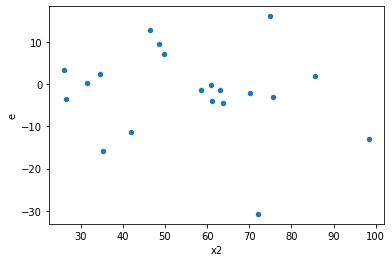

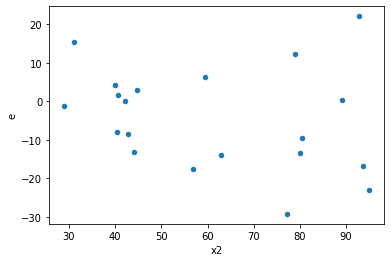

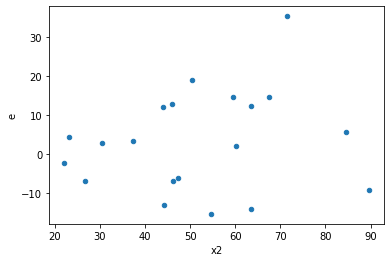

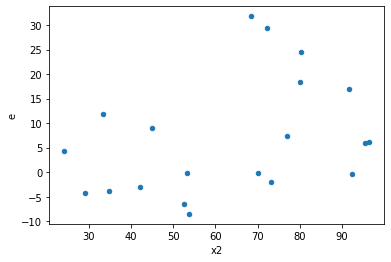

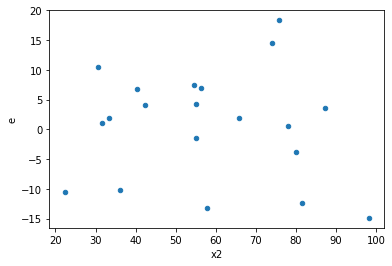

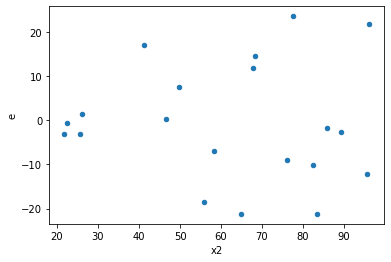

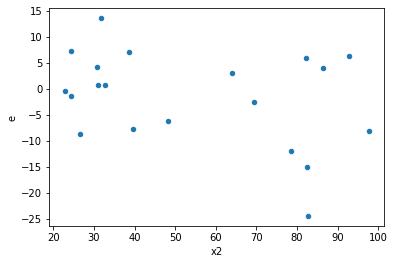

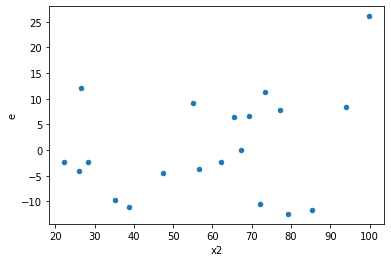

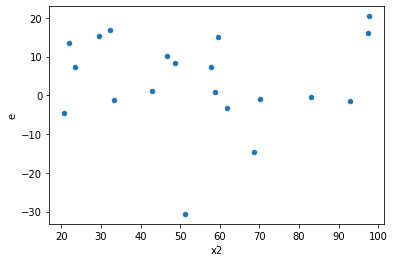

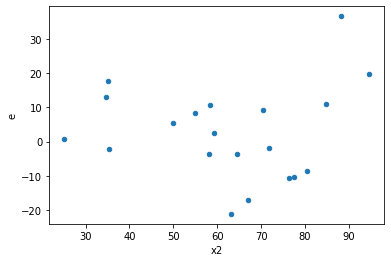

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,7.0,351.0484036230555,987.6583263108118,50.149771946150786,141.09404661583025,2.8134534044807324,0.19573254958644415,0.9021337252067779,0.09786627479322207,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,851.9435475878532,1339.3945984270633,121.70622108397903,191.34208548958048,1.572163557338221,0.5651121242262522,0.7174439378868739,0.2825560621131261,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,402.976247467012,670.0463633684492,50.3720309333765,111.67439389474153,2.2169920851999256,0.3477159779153458,0.8261420110423271,0.1738579889576729,Reject001=1 : Homoscedasticity
8.0,1.0,13.0,7.997156312768529e-25,1091.175425322709,7.997156312768529e-25,83.93657117866994,1.049580224468715e+26,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
9.0,5.0,9.0,244.29731796672172,1391.677251544368,48.859463593344344,154.630805727152,3.164807682174715,0.1272868955466644,0.9363565522266678,0.0636434477733322,Reject001=1 : Homoscedasticity
10.0,1.0,13.0,5.150693731241448e-24,1294.7673436577509,5.150693731241448e-24,99.59748797367314,1.933671329933019e+25,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
12.0,4.0,10.0,75.1856309457632,2217.878046881099,18.7964077364408,221.78780468810993,11.799478272549255,0.0016745353230442905,0.9991627323384779,0.0008372676615221453,Reject001=0 : Heteroscedasticity
14.0,5.0,9.0,78.73126568193675,736.82642814414,15.746253136387349,81.86960312712667,5.199306934672457,0.032236064016507804,0.9838819679917461,0.016118032008253902,Reject001=1 : Homoscedasticity
17.0,9.0,5.0,952.9820526743173,1405.8770102384256,105.88689474159081,281.1754020476851,2.6554315596266473,0.29461079172274607,0.852694604138627,0.14730539586137303,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,351.0484036230555,987.6583263108118,50.149771946150786,141.09404661583025,2.8134534044807324,0.19573254958644415,Reject001=1 : Homoscedasticity
1.0,6.0,8.0,2017.530901569351,353.923910813563,336.2551502615585,44.240488851695375,0.1315682118691196,0.023533397118691776,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,851.9435475878532,1339.3945984270633,121.70622108397903,191.34208548958048,1.572163557338221,0.5651121242262522,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,665.3475482331254,257.409233805919,83.16844352914067,42.90153896765316,0.515839147003169,0.3794804253141526,Reject001=1 : Homoscedasticity
4.0,8.0,6.0,688.3039786054877,245.62507923610644,86.03799732568596,40.93751320601774,0.4758073697491349,0.3264728678084346,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,1200.3682330214278,1033.8112718108189,171.48117614591825,147.68732454440268,0.861245110767909,0.8488306199213685,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,402.976247467012,670.0463633684492,50.3720309333765,111.67439389474153,2.2169920851999256,0.3477159779153458,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,518.5900115804886,384.96798354428506,74.08428736864123,54.99542622061215,0.742335901092718,0.7041692533640878,Reject001=1 : Homoscedasticity
8.0,1.0,13.0,7.997156312768529e-25,1091.175425322709,7.997156312768529e-25,83.93657117866994,1.049580224468715e+26,0.0,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      911
Reject001=0 : Heteroscedasticity     89
Name: Result_test, dtype: int64